In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset:

In [2]:

filepath='data/retail_sales.csv'
df=pd.read_csv(filepath)


In [3]:
# shape and the columns:
print("shape",df.shape)
print('Cloumns :',df.columns.tolist())

shape (5, 8)
Cloumns : ['Order ID', 'Order Date', 'Customer Name', 'Region', 'Product Category', 'Sales', 'Discount', 'Profit']


# quick overview of the data:

In [4]:
# data info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          5 non-null      int64  
 1   Order Date        5 non-null      object 
 2   Customer Name     5 non-null      object 
 3   Region            5 non-null      object 
 4   Product Category  5 non-null      object 
 5   Sales             5 non-null      float64
 6   Discount          5 non-null      float64
 7   Profit            5 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 452.0+ bytes


In [5]:
# few rows:
df

,Order ID,Order Date,Customer Name,Region,Product Category,Sales,Discount,Profit
0,1001,10-01-2025,Alice Smith,East,Furniture,250.75,0.10,50.15
1,1002,15-01-2025,Bob Johnson,West,Technology,550.00,0.20,100.00
2,1003,01-02-2025,Charlie Lee,East,Office Supplies,120.40,0.00,30.10
3,1004,05-02-2025,David Wilson,South,Furniture,300.50,0.15,45.20
4,1005,10-02-2025,Eva Brown,North,Technology,800.20,0.05,120.00


# making cleaned version of csv

In [6]:
# check for missing values
df.isnull().sum()

Order ID            0
Order Date          0
Customer Name       0
Region              0
Product Category    0
Sales               0
Discount            0
Profit              0
dtype: int64

In [7]:
'No missing values'

'No missing values'

In [8]:
# remove duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
'No duplicated values here'

'No duplicated values here'

In [12]:
# standardize columns

# Convert 'Order Date' to datetime
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

# stripping and standardizing the column strings
df['Customer Name']=df['Customer Name'].str.strip().str.title()
df['Region']=df['Region'].str.strip().str.title()
df['Product Category']=df['Product Category'].str.strip().str.title()

# droping the duplicated values if exists:
df=df.drop_duplicates()





In [13]:
# converting the dataset to csv file:

df.to_csv('cleaned.csv',index=False)

# Univariate Analysis

In [14]:
df.head()

,Order ID,Order Date,Customer Name,Region,Product Category,Sales,Discount,Profit
0,1001,2025-10-01,Alice Smith,East,Furniture,250.75,0.10,50.15
1,1002,NaT,Bob Johnson,West,Technology,550.00,0.20,100.00
2,1003,2025-01-02,Charlie Lee,East,Office Supplies,120.40,0.00,30.10
3,1004,2025-05-02,David Wilson,South,Furniture,300.50,0.15,45.20
4,1005,2025-10-02,Eva Brown,North,Technology,800.20,0.05,120.00


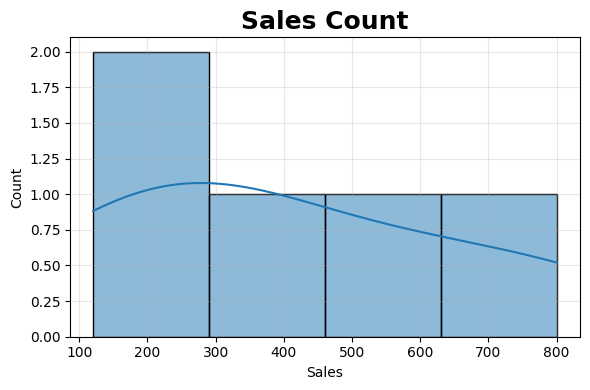

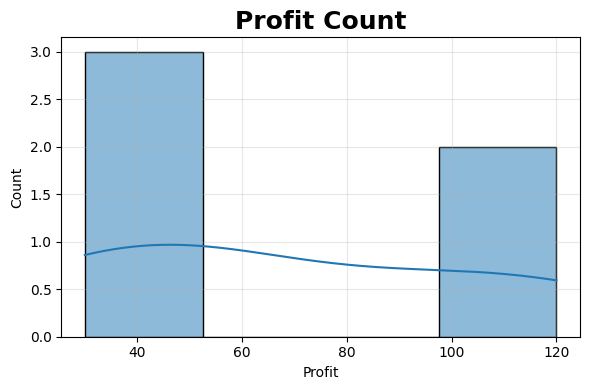

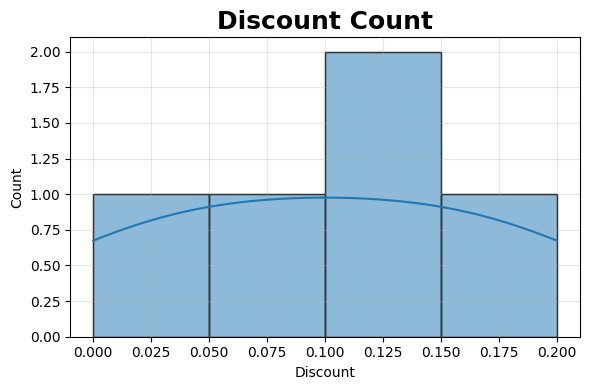

In [15]:
# numerical values and their counts:

# preparing the data:
numerical_cols=['Sales','Profit','Discount']

for cols in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df[cols],kde=True)
    plt.title(f'{cols} Count',fontsize=18,weight='bold')
    print("\n")
    plt.grid( axis='both', alpha=0.3)
    plt.tight_layout()
    plt.show()
    





In [ ]:
# for categorical values:

categeorical_cols=['Region','Product Category']

for cols in categeorical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df[cols],kde=True)
    
    plt.title(f'{cols} Count',fontsize=18,weight='bold')
    print("\n")
    plt.grid( axis='both', alpha=0.3)
    plt.tight_layout()
    plt.show()
    



# Bivariate Analysis

In [ ]:
df.head()

In [ ]:
# region vs sales

plt.figure(figsize=(10,6))

df=df.sort_values(by='Sales')

barplot=sns.barplot(data=df,x="Region",y="Sales")

for p in barplot.patches:
    barplot.annotate(format(p.get_height()+0.5, '.2f'),  
                     (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha='center', va='bottom', fontsize=9, color='black')

    
plt.title('Regions vs Sales',fontsize=18,weight='bold')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xticks(fontsize=10,ha='right')
plt.yticks(fontsize=12)
plt.grid( axis='both',linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()

In [ ]:
# region vs profit
plt.figure(figsize=(10,6))
barplot=sns.barplot(data=df,x='Region',y='Profit')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),  
                     (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha='center', va='bottom', fontsize=9, color='black')


plt.title('profit across regions',fontsize=18,weight='bold')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.xticks(fontsize=10,ha='right')
plt.yticks(fontsize=12)
plt.grid( axis='both',linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()


In [ ]:
# product categeory vs profit
# region vs sales

plt.figure(figsize=(10,10))



barplot=sns.barplot(data=df,x="Product Category",y="Profit")

for p in barplot.patches:
    barplot.annotate(format(p.get_height()+0.5, '.2f'),  
                     (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha='center', va='bottom', fontsize=9, color='black')

    
plt.title('Product Category vs Profit',fontsize=18,weight='bold')
plt.xlabel('Category',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.xticks(fontsize=10,ha='right')
plt.yticks(fontsize=12)
plt.grid( axis='both',linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()

In [ ]:
#discount vs Profit:
plt.figure(figsize=(10,6))
barplot=sns.barplot(data=df,x='Discount',y='Profit')
for p in barplot.patches:
    barplot.annotate(format(p.get_height()+0.5, '.2f'),  
                     (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha='center', va='bottom', fontsize=9, color='black')
plt.title('discount vs Profit',fontsize=18,weight='bold')
plt.xlabel('Discount',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.xticks(fontsize=10,ha='right')
plt.yticks(fontsize=12)
plt.grid( axis='both',linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Multivariate Analysis

In [ ]:
df.head()

In [ ]:
# Calculate correlation
corr_matrix = df.corr(numeric_only=True)

# Mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Pro-level heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", center=0, linewidths=.5)
plt.title("Correlation Matrix with Upper Triangle Mask", fontsize=14)
plt.show()

High sales are strongly tied to higher profits, meaning discounting hasn’t significantly eaten into margins.

Negative correlation between Order ID and Discount suggests newer orders may include more discount offers.



In [ ]:
sns.pairplot(df[['Sales', 'Profit', 'Discount', 'Region']], hue='Region', diag_kind='hist')
plt.suptitle("Pairplot of Sales, Profit, Discount by Region", y=1.02)
plt.show()

In [ ]:
region_category_counts = df.groupby(['Region','Product Category']).size().unstack().fillna(0)
region_category_counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Stacked Bar: Region vs Product Category")
plt.ylabel("Count")
plt.show()

In [ ]:
# finding outliers
def outliers_IQR(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    lower_b=Q1-1.5*IQR
    upper_b=Q3+1.5*IQR

    outliers_iqr=df[(df[col]<lower_b) | (df[col]>upper_b)]

    return outliers_iqr

In [ ]:
# outlires of profit:
print(outliers_IQR('Sales'))

In [ ]:
# there is no outlires in this cause its basic practice dataset 

Never remove outliers blindly — always tie decisions to business logic + data patterns.

